In [1]:
# Add the libraies path to python
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..\\python\\database'))
sys.path.append(os.path.join(os.getcwd(), '..\\python\\plots'))
sys.path.append(os.path.join(os.getcwd(), '..\\python\\charts'))

# Library imports
import database
import roster_plots
import roster_charts
import performance_plots
import score_plots
import draft_charts

In [2]:
# Constants to use in this notebook
season = "2024"
show_charts = True
show_plots = True
# Build the database for the season
db = database.database(season)

2024 Scores


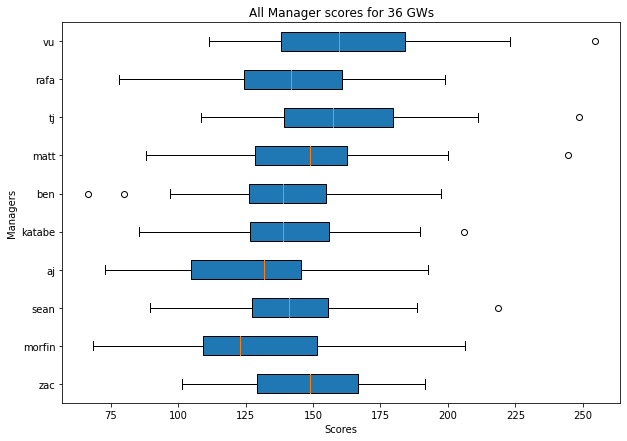

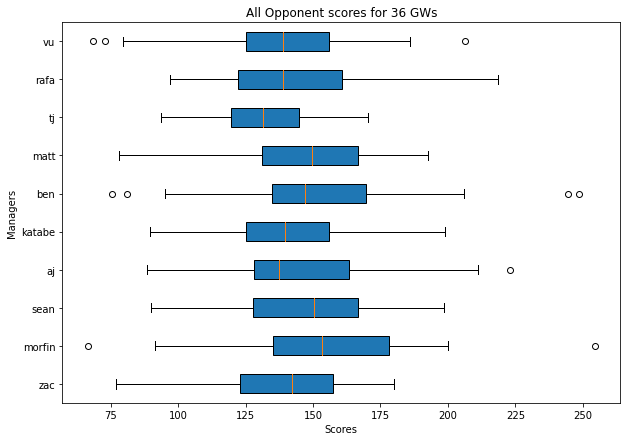

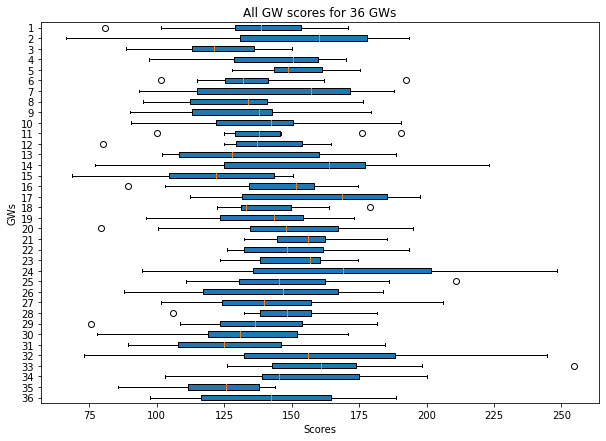

In [3]:
print(db.get_season(), "Scores")

if(show_plots):
    score_plots.plot_manager_scores(db)
    score_plots.plot_opponent_scores(db)
    score_plots.plot_gw_scores(db)

2024 Performances


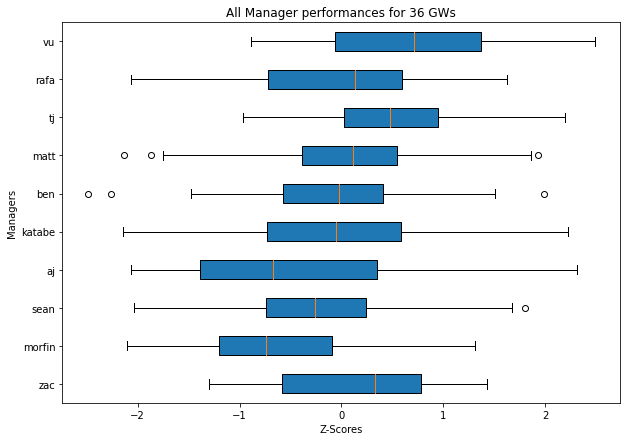

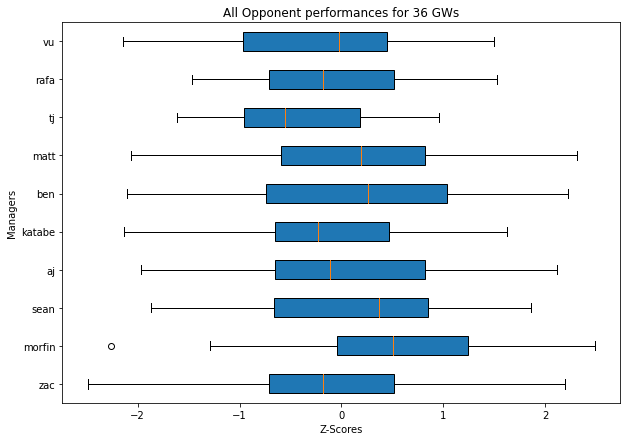

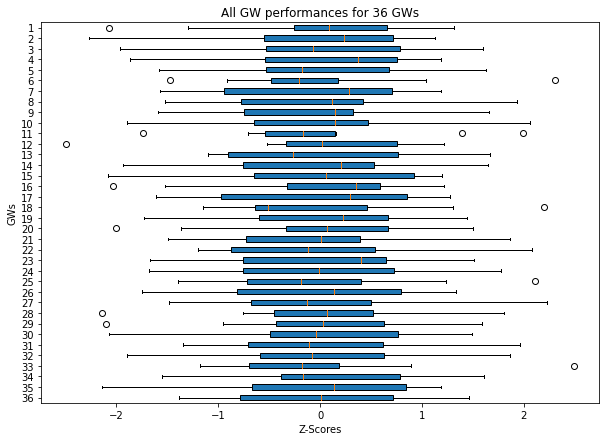

In [4]:
print(db.get_season(), "Performances")

if(show_plots):
    performance_plots.plot_manager_performances(db)
    performance_plots.plot_opponent_performances(db)
    performance_plots.plot_gw_performances(db)

2024 Roster Contributions
+---------+---------------------------------+----------------+--------------+---------------+---------------+
| Manager | Most Impactful Player (Drafted) | % Contribution | Total Points | Total Minutes | Points per 90 |
+---------+---------------------------------+----------------+--------------+---------------+---------------+
|   zac   |        Jarrod Bowen (WHU)       |      8.98      |    476.0     |      2702     |     15.85     |
|  morfin |        Pedro Porro (TOT)        |     10.25      |    473.5     |      2452     |     17.38     |
|   sean  |       Mohamed Salah (LIV)       |     15.92      |    804.5     |      3188     |     22.71     |
|    aj   |      Antonee Robinson (FUL)     |     11.65      |    542.0     |      2897     |     16.84     |
|  katabe |        Cole Palmer (CHE)        |     12.96      |    654.0     |      3004     |     19.59     |
|   ben   |      Bruno Fernandes (MUN)      |     11.72      |    588.5     |      2846     | 

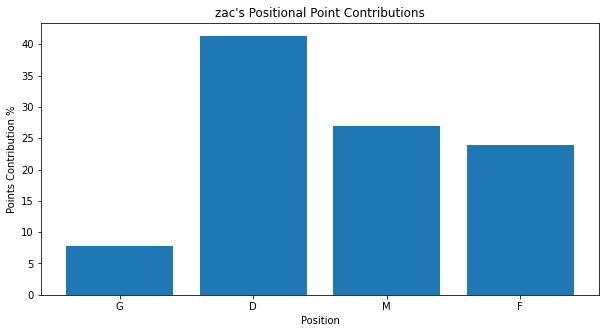

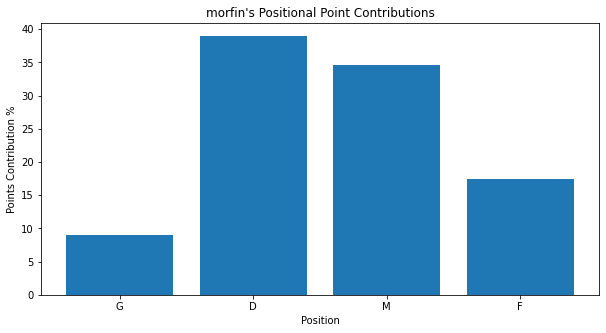

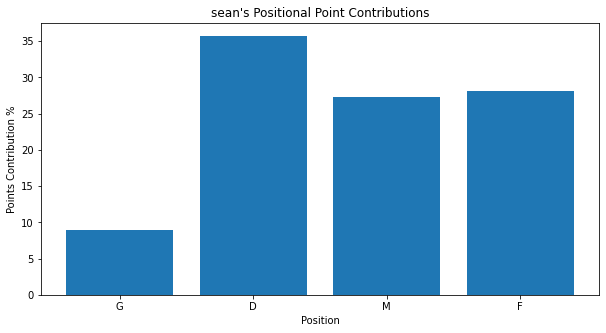

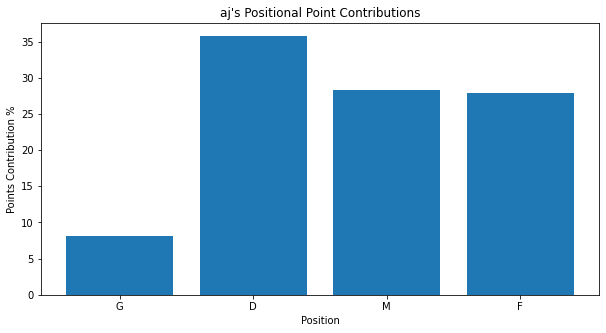

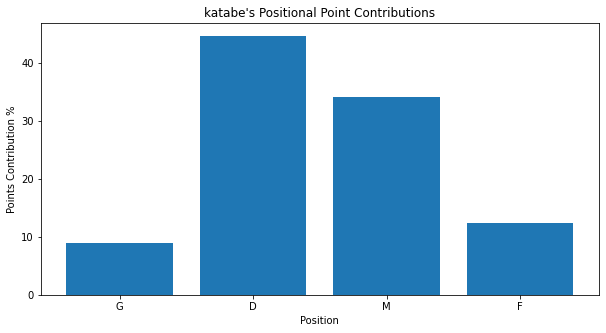

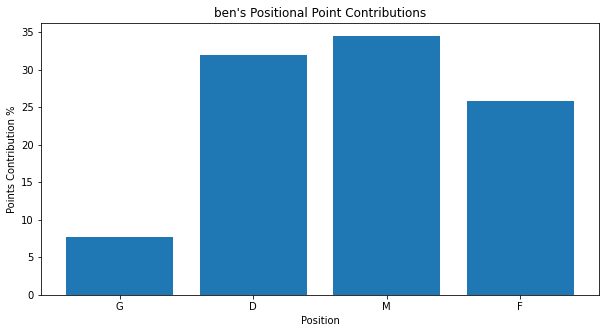

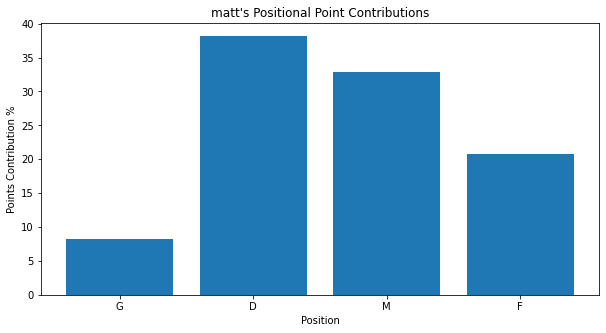

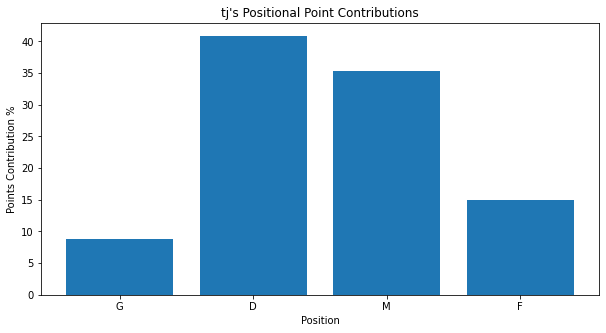

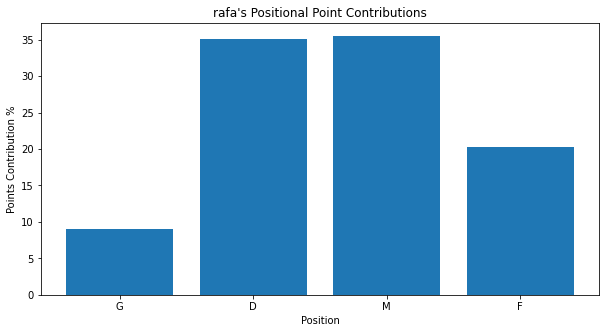

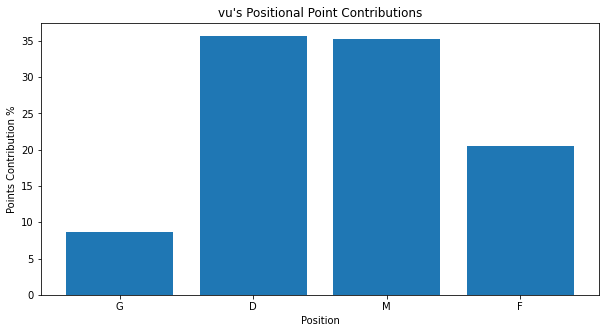

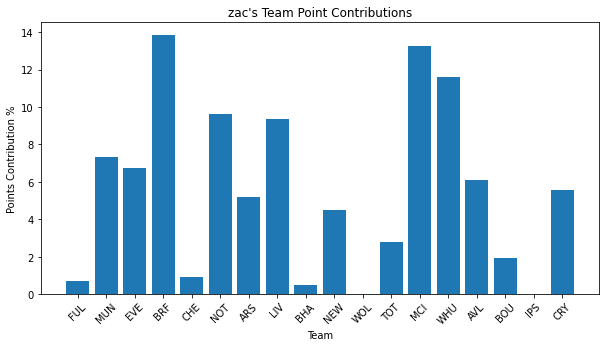

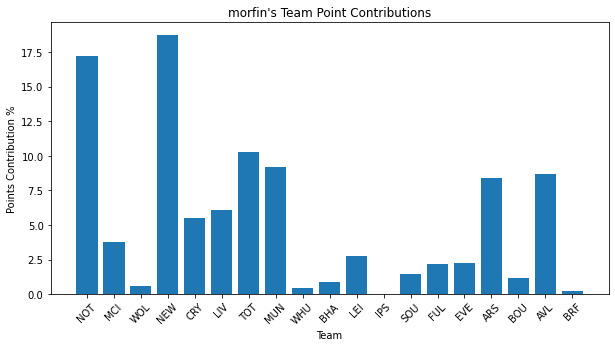

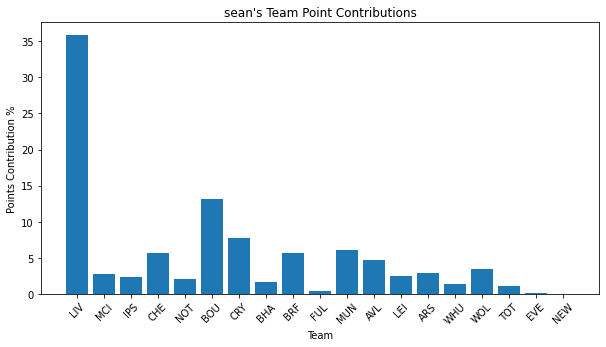

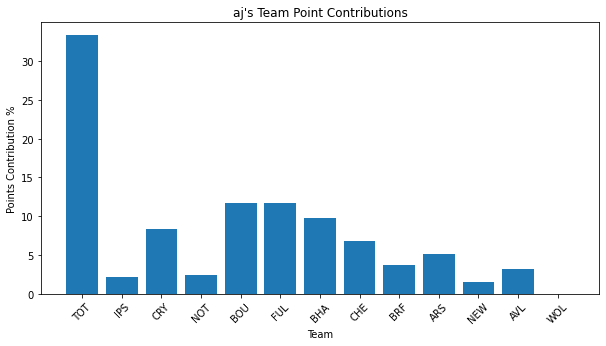

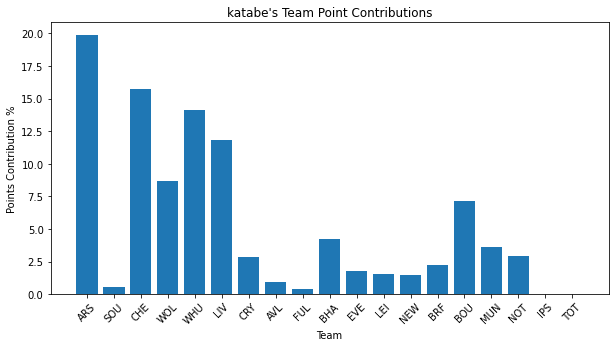

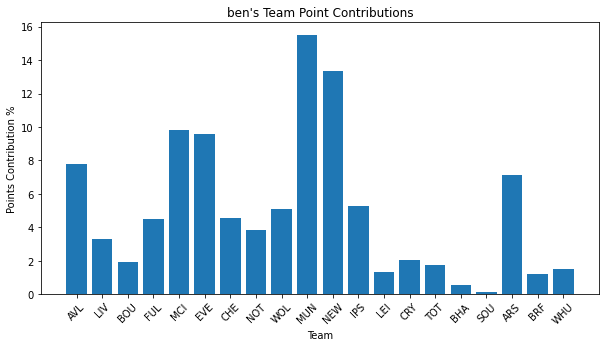

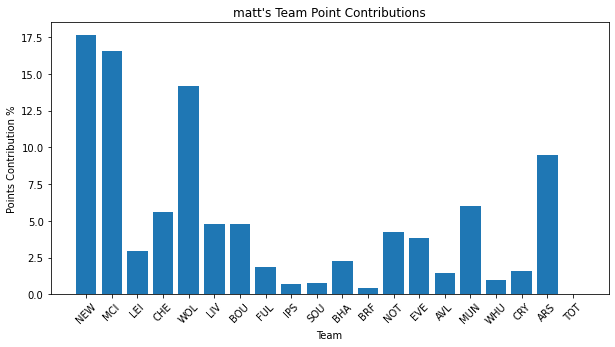

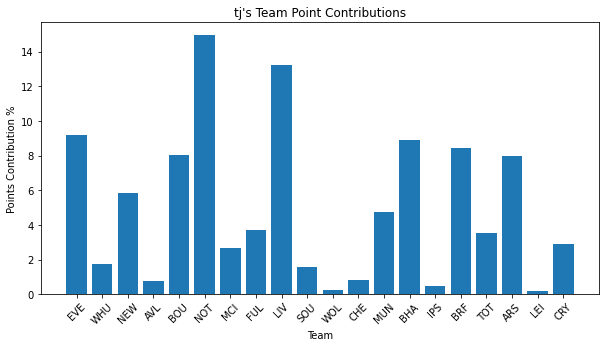

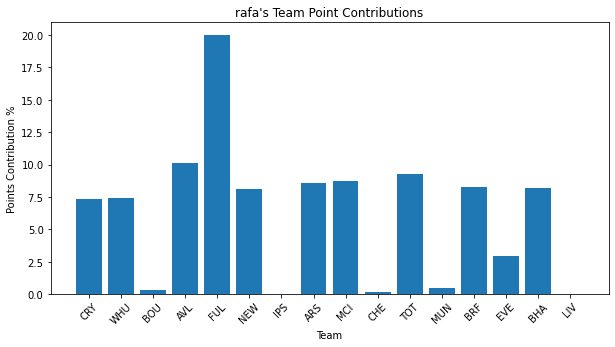

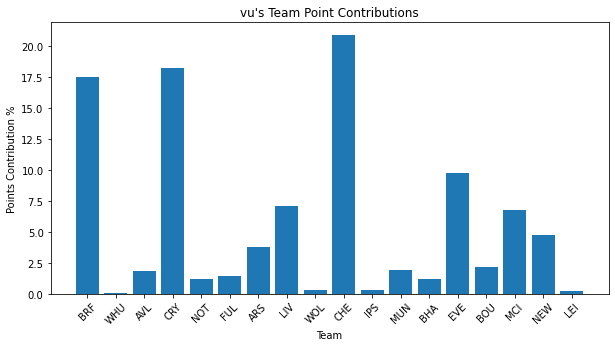

In [5]:
print(db.get_season(), "Roster Contributions")

if(show_charts):
    roster_charts.chart_roster_contributions_for_players(db, True)
    roster_charts.chart_roster_contributions_for_players(db, False)
    roster_charts.chart_roster_contributions_for_top_teams(db)
    roster_charts.chart_roster_contributions_for_teams(db)
    roster_charts.chart_roster_contributions_for_positions(db)

if(show_plots):
    roster_plots.plot_roster_scores_by_position(db)
    roster_plots.plot_roster_scores_by_team(db)

In [6]:
print(db.get_season(), "Positional Contributions")
# Chart the contributions for the season
roster_charts.chart_postitional_contributions(db)

2024 Positional Contributions
+----------+----------------+--------------+
| Position | % Contribution | Total Points |
+----------+----------------+--------------+
|    D     |     37.85      |   19524.5    |
|    M     |     32.52      |   16773.5    |
|    F     |      21.1      |   10883.0    |
|    G     |      8.53      |    4398.0    |
+----------+----------------+--------------+


In [7]:
print(db.get_season(), "Team Contributions")
# Chart the contributions for the season
roster_charts.chart_team_contributions(db)

2024 Team Contributions
+------+----------------+--------------+
| Team | % Contribution | Total Points |
+------+----------------+--------------+
| LIV  |      9.25      |    4773.5    |
| ARS  |      7.8       |    4022.5    |
| NEW  |      7.51      |    3872.5    |
| MCI  |      6.55      |    3377.5    |
| BRF  |      6.44      |    3324.0    |
| CRY  |      6.33      |    3267.0    |
| CHE  |      6.3       |    3251.0    |
| NOT  |      5.86      |    3022.0    |
| TOT  |      5.78      |    2983.5    |
| MUN  |      5.45      |    2810.5    |
| BOU  |      5.2       |    2683.0    |
| EVE  |      4.83      |    2491.0    |
| FUL  |      4.57      |    2357.0    |
| AVL  |      4.44      |    2289.5    |
| WHU  |      3.94      |    2030.0    |
| BHA  |      3.8       |    1961.0    |
| WOL  |      3.26      |    1682.5    |
| LEI  |      1.12      |    576.0     |
| IPS  |      1.1       |    568.5     |
| SOU  |      0.46      |    236.5     |
+------+----------------+--------

In [8]:
print(db.get_season(), "Drafts")

if(show_charts):
    draft_charts.chart_draft_impacts(db)

2024 Drafts
+----------+------------+------------------------+--------------+------------------+
| Drafter  |  Position  |          Name          | Total Points | Traded / Dropped |
+----------+------------+------------------------+--------------+------------------+
|          |            |                        |              |                  |
| Round 1  | ---------- |       ----------       |  ----------  |    ----------    |
|          |            |                        |              |                  |
|   zac    |     F      |     Erling Haaland     |    463.0     |      False       |
|  morfin  |     M      |      Bukayo Saka       |    351.5     |      False       |
|   sean   |     F      |     Mohamed Salah      |    804.5     |      False       |
|    aj    |     F      |     Son Heung-Min      |    363.5     |      False       |
|  katabe  |     M      |      Cole Palmer       |    654.0     |      False       |
|   ben    |     M      |    Bruno Fernandes     |   

2024 Activity


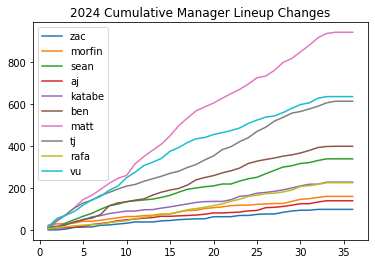

In [9]:
print(db.get_season(), "Activity")
# Plot the manager activity for the season

import pandas as pd

number_of_gws = db.get_number_of_gws()
managers = db.get_managers()
manager_activity = dict()
for name in managers:
    manager_activity[name] = dict()
    
x_axis = list()
for gw_index in range(number_of_gws):
    gw = gw_index + 1
    x_axis.append(gw)
    for name in managers:
        
        manager_lineup_changes = db.get_manager_activity_reader(name).get_lineup_changes()
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
        
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
            
        if(gw > 1):
            prev_manager_lineup_changes_for_gw = manager_activity[name][gw - 1]
            manager_activity[name][gw] = manager_lineup_changes_for_gw + prev_manager_lineup_changes_for_gw
        else:
            manager_activity[name][gw] = manager_lineup_changes_for_gw
            
        # manager_activity[name][gw] = manager_lineup_changes_for_gw
        
    
df = pd.DataFrame(data=manager_activity)
df.head()    
df.plot(title = db.get_season() + ' Cumulative Manager Lineup Changes');

2024 Activity


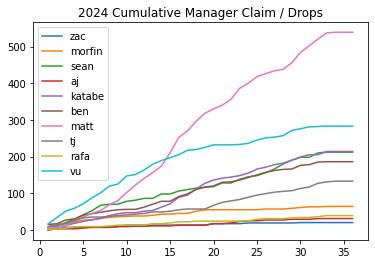

In [10]:
print(db.get_season(), "Activity")
# Plot the manager activity for the season

import pandas as pd

number_of_gws = db.get_number_of_gws()
managers = db.get_managers()
manager_activity = dict()
for name in managers:
    manager_activity[name] = dict()
    
x_axis = list()
for gw_index in range(number_of_gws):
    gw = gw_index + 1
    x_axis.append(gw)
    for name in managers:
        
        manager_lineup_changes = db.get_manager_activity_reader(name).get_claims_drops()
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
        
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
            
        if(gw > 1):
            prev_manager_lineup_changes_for_gw = manager_activity[name][gw - 1]
            manager_activity[name][gw] = manager_lineup_changes_for_gw + prev_manager_lineup_changes_for_gw
        else:
            manager_activity[name][gw] = manager_lineup_changes_for_gw
            
        # manager_activity[name][gw] = manager_lineup_changes_for_gw
        
    
df = pd.DataFrame(data=manager_activity)
df.head()    
df.plot(title = db.get_season() + ' Cumulative Manager Claim / Drops');